In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('C://Users//aaliy//Documents//cardio...csv')

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
0,0,18393,2,168,62.0,110,80,1,1,0,0.0,1,0,73
1,1,20228,1,156,85.0,140,90,3,1,0,0.0,1,1,68
2,2,18857,1,165,64.0,130,70,3,1,0,0.0,0,1,72
3,3,17623,2,169,82.0,150,100,1,1,0,0.0,1,1,75
4,4,17474,1,156,56.0,100,60,1,1,0,0.0,0,0,76


In [ ]:
df.shape

(70000, 14)

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           1
active         0
cardio         0
newage         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
newage         0
dtype: int64

In [ ]:
df.drop('age', axis=1, inplace=True)

In [ ]:
df.dtypes

id               int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco           float64
active           int64
cardio           int64
newage           int64
dtype: object

In [ ]:
df.corr()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
id,1.000000,0.003536,-0.002997,-0.001794,0.003356,-0.002530,0.006166,0.002544,-0.003707,0.001204,0.003767,0.003824,-0.003677
gender,0.003536,1.000000,0.499018,0.155382,0.006005,0.015255,-0.035870,-0.020553,0.338146,0.170973,0.005856,0.008090,0.022929
height,-0.002997,0.499018,1.000000,0.290944,0.005488,0.006151,-0.050286,-0.018670,0.188001,0.094426,-0.006581,-0.010845,0.081487
weight,-0.001794,0.155382,0.290944,1.000000,0.030703,0.043711,0.141726,0.106802,0.067788,0.067119,-0.016877,0.181643,-0.053667
ap_hi,0.003356,0.006005,0.005488,0.030703,1.000000,0.016086,0.023779,0.011841,-0.000922,0.001408,-0.000033,0.054475,-0.020872
ap_lo,-0.002530,0.015255,0.006151,0.043711,0.016086,1.000000,0.024021,0.010808,0.005186,0.010601,0.004781,0.065720,-0.017606
cholesterol,0.006166,-0.035870,-0.050286,0.141726,0.023779,0.024021,1.000000,0.451521,0.010366,0.035770,0.009895,0.221124,-0.154194
gluc,0.002544,-0.020553,-0.018670,0.106802,0.011841,0.010808,0.451521,1.000000,-0.004743,0.011257,-0.006792,0.089269,-0.098672
smoke,-0.003707,0.338146,0.188001,0.067788,-0.000922,0.005186,0.010366,-0.004743,1.000000,0.340093,0.025860,-0.015482,0.047589
alco,0.001204,0.170973,0.094426,0.067119,0.001408,0.010601,0.035770,0.011257,0.340093,1.000000,0.025478,-0.007327,0.029728


In [ ]:
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,49973.133630,1.349562,164.359034,74.205393,128.817269,96.630509,1.366848,1.226432,0.088130,0.053772,0.803726,0.499693,70.270461
std,28850.890423,0.476835,8.210023,14.395645,154.012520,188.473875,0.680227,0.572235,0.283486,0.225569,0.397181,0.500003,6.762040
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,59.000000
25%,25007.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,65.000000
50%,50002.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,70.000000
75%,74889.500000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,75.000000
max,99999.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,94.000000


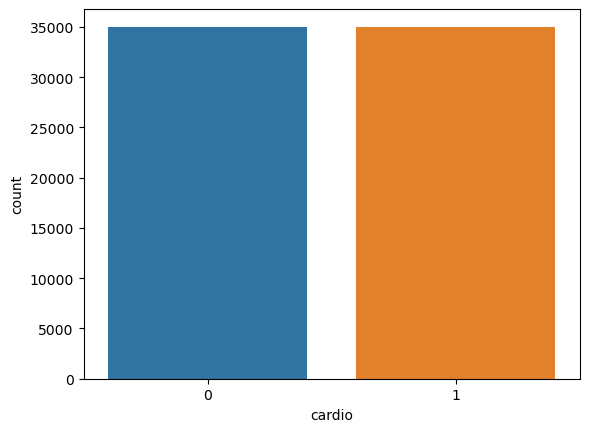

In [ ]:
sns.countplot(df,x='cardio')
plt.show()

In [ ]:
x = df.drop('cardio', axis=1)
y= df['cardio']

In [ ]:
x.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,newage
0,0,2,168,62.0,110,80,1,1,0,0.0,1,73
1,1,1,156,85.0,140,90,3,1,0,0.0,1,68
2,2,1,165,64.0,130,70,3,1,0,0.0,0,72
3,3,2,169,82.0,150,100,1,1,0,0.0,1,75
4,4,1,156,56.0,100,60,1,1,0,0.0,0,76


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state = 42)

In [ ]:
x_train.shape

(55999, 12)

In [ ]:
x_test.shape

(14000, 12)

In [ ]:
svmmodel = SVC()

In [ ]:
svmmodel.fit(x_train,y_train)

SVC()

In [ ]:
svmpred = svmmodel.predict(x_test)

In [ ]:
svmpred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
accuracy = accuracy_score(svmpred,y_test)*100

In [ ]:
accuracy

49.08571428571429

In [ ]:
naive = GaussianNB()

In [ ]:
naive.fit (x_train, y_train)

GaussianNB()

In [ ]:
naivepred = naive.predict (x_test)

In [ ]:
naivepred[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [ ]:
accuracy = accuracy_score(naivepred,y_test)*100

In [ ]:
accuracy

56.58571428571428

In [ ]:
x.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,newage
0,0,2,168,62.0,110,80,1,1,0,0.0,1,73
1,1,1,156,85.0,140,90,3,1,0,0.0,1,68
2,2,1,165,64.0,130,70,3,1,0,0.0,0,72
3,3,2,169,82.0,150,100,1,1,0,0.0,1,75
4,4,1,156,56.0,100,60,1,1,0,0.0,0,76


In [ ]:
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
0,0,2,168,62.0,110,80,1,1,0,0.0,1,0,73
1,1,1,156,85.0,140,90,3,1,0,0.0,1,1,68
2,2,1,165,64.0,130,70,3,1,0,0.0,0,1,72
3,3,2,169,82.0,150,100,1,1,0,0.0,1,1,75
4,4,1,156,56.0,100,60,1,1,0,0.0,0,0,76


In [ ]:
new_inputs=[8,6,199,95.1,280,60,4,2,0,5.0,3,69]

In [ ]:
predictions=naive.predict([new_inputs])

C:\Users\aaliy\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,newage
0,0,2,168,62.0,110,80,1,1,0,0.0,1,0,73
1,1,1,156,85.0,140,90,3,1,0,0.0,1,1,68
2,2,1,165,64.0,130,70,3,1,0,0.0,0,1,72
3,3,2,169,82.0,150,100,1,1,0,0.0,1,1,75
4,4,1,156,56.0,100,60,1,1,0,0.0,0,0,76
